In [26]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/SumanGouda/Scikit-Learn-/refs/heads/main/PROJECT/HEART%20DISEASE/heart_disease_uci.csv')

### <span style="color:cyan"><i>Data Cleaning</i></span>

In [104]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_cols_most_missing = ['fbs', 'thal', 'slope', 'exang']
categorical_cols_mcar = ['restecg']

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
numerical_cols_mcar = ['trestbps', 'chol']
numerical_cols_not_mcar = ['thalch', 'oldpeak']
not_zero_cols = ['chol', 'trestbps']


#### Handling those columns whose values can not be zero or negerive.

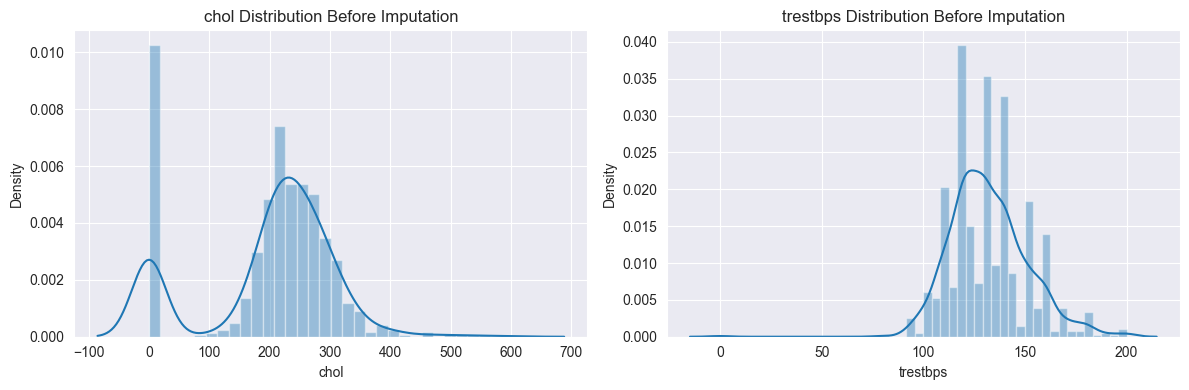

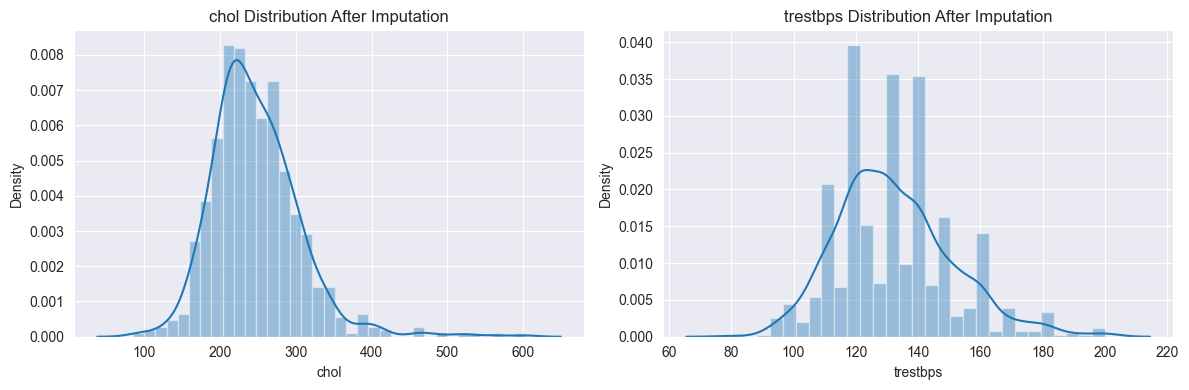

In [105]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(1, len(not_zero_cols), figsize=(12, 4))

# Loop through each column and create a distplot
for i, col in enumerate(not_zero_cols):
    sns.distplot(df[col], ax=axs[i])

# Set the title and labels for each subplot
for i, col in enumerate(not_zero_cols):
    axs[i].set_title(f'{col} Distribution Before Imputation')

# Layout so plots do not overlap
fig.tight_layout()

# Making all the zero values to NaN then plotting the distributions curve
fig, axs = plt.subplots(1, len(not_zero_cols), figsize=(12, 4))

# Loop through each column and create a distplot
for i, col in enumerate(not_zero_cols):
    df[col] = df[col].replace(0, np.nan)
    sns.distplot(df[col], ax=axs[i])

# Set the title and labels for each subplot
for i, col in enumerate(not_zero_cols):
    axs[i].set_title(f'{col} Distribution After Imputation')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


#### Handling columns in numerical mcar

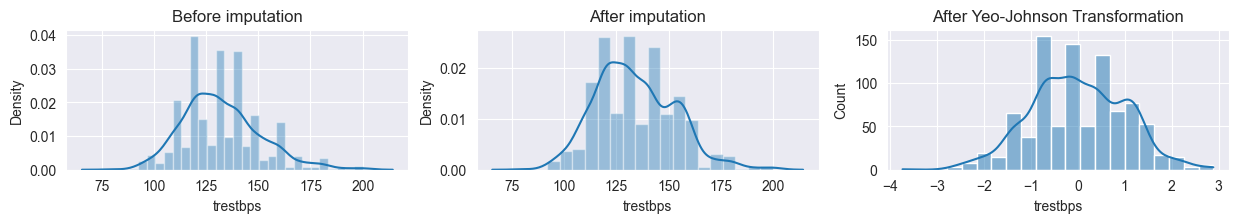

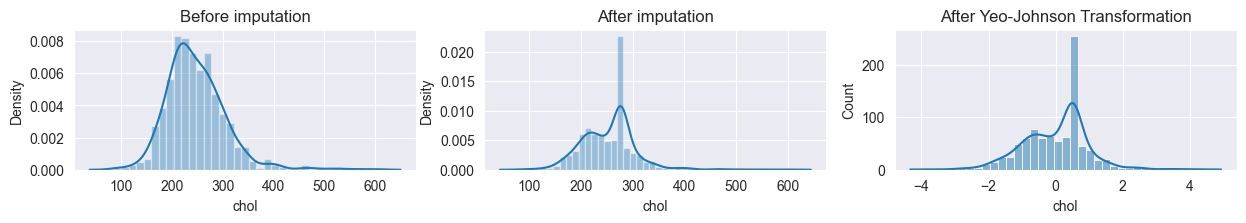

In [106]:
# Befroe imputation
plt.figure(figsize=(15, 4))
plt.subplot(2, 3, 1)
sns.distplot(df['trestbps'])    
plt.title('Before imputation')

# After imputation
mean_val, std_val = df['trestbps'].mean(), df['trestbps'].std()
df['trestbps'] = df['trestbps'].fillna(np.random.normal(mean_val, std_val))     # Random imputation from mean and std

plt.subplot(2, 3, 2)
sns.distplot(df['trestbps'])
plt.title('After imputation')

# Apply Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['trestbps'] = pt.fit_transform(df[['trestbps']])

# Plot the transformed data
plt.subplot(2, 3, 3)
sns.histplot(df['trestbps'], kde=True)  # Replaces distplot
plt.title('After Yeo-Johnson Transformation')
plt.show()

# Same for the chol column

# Befroe imputation
plt.figure(figsize=(15, 4))
plt.subplot(2, 3, 1)
sns.distplot(df['chol'])    
plt.title('Before imputation')

# After imputation
mean_val, std_val = df['chol'].mean(), df['chol'].std()
df['chol'] = df['chol'].fillna(np.random.normal(mean_val, std_val))     # Random imputation from mean and std

plt.subplot(2, 3, 2)
sns.distplot(df['chol'])
plt.title('After imputation')

# Apply Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['chol'] = pt.fit_transform(df[['chol']])

# Plot the transformed data
plt.subplot(2, 3, 3)
sns.histplot(df['chol'], kde=True)  # Replaces distplot
plt.title('After Yeo-Johnson Transformation')
plt.show()


##### Scaling the numerical colulmns

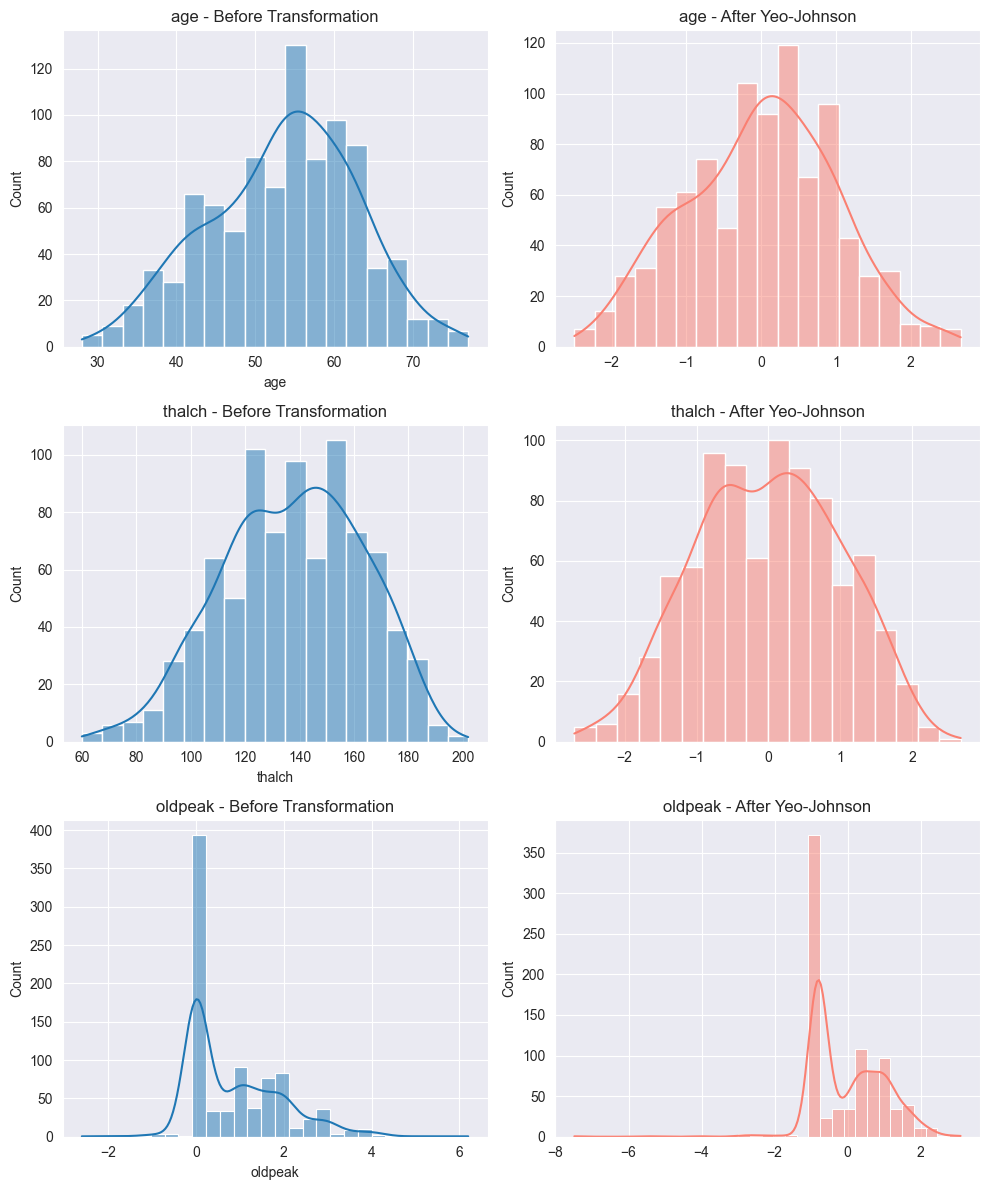

In [114]:
# Create subplots: two columns (before, after) and one row per feature
req_cols = [cols for cols in numerical_cols if cols not in numerical_cols_mcar]
n = len(req_cols)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 4 * n))

pt = PowerTransformer(method='yeo-johnson')

for i, col in enumerate(req_cols):
    # Before transformation
    sns.histplot(df[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{col} - Before Transformation')

    # Apply Yeo-Johnson
    transformed = pt.fit_transform(df[[col]])
    sns.histplot(transformed.flatten(), ax=axes[i, 1], kde=True, color='salmon')
    axes[i, 1].set_title(f'{col} - After Yeo-Johnson')

plt.tight_layout()
plt.show()


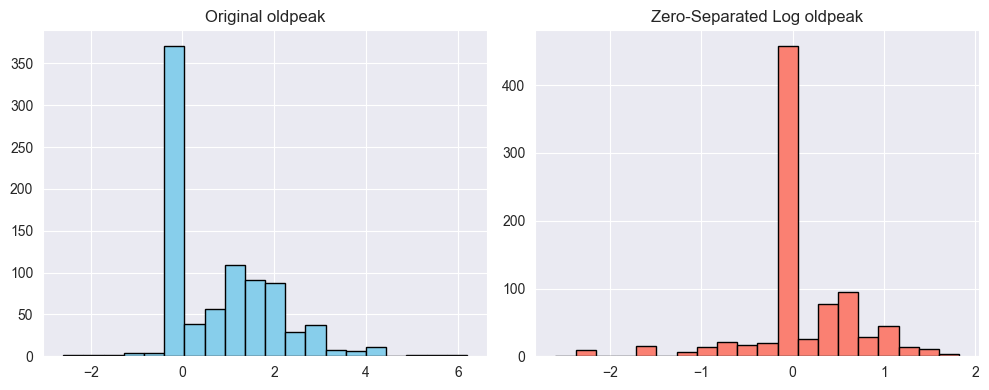

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample: replace this with your real dataframe
# df = pd.read_csv("your_file.csv")

# Separate transformation
df['oldpeak_log'] = df['oldpeak']  # copy the column
mask = df['oldpeak'] > 0  # only positive values
df.loc[mask, 'oldpeak_log'] = np.log(df.loc[mask, 'oldpeak'])

# Compare histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df['oldpeak'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Original oldpeak')

axes[1].hist(df['oldpeak_log'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Zero-Separated Log oldpeak')

plt.tight_layout()
plt.show()


#### Analysing with the columns in <i>'categorical_cols_mcar'</i>

In [95]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a new column for the NaN values
for col in categorical_cols_mcar:
    df[f'{col}_nan'] = df[col].isnull().astype(int)

# Create a figure with two subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=['Before Imputation', 'After Imputation'])

# Loop through each column and create a count plot
for col in categorical_cols_mcar:
    # Before imputation
    counts_before = df[col].value_counts()
    fig.add_trace(go.Bar(x=counts_before.index, y=counts_before.values), row=1, col=1)
    
    # Impute missing values with the most frequent value
    most_frequent_value = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent_value)
    
    # After imputation
    counts_after = df[col].value_counts()
    fig.add_trace(go.Bar(x=counts_after.index, y=counts_after.values), row=1, col=2)

# Update the layout
fig.update_layout(height=400, width=1500, template='plotly_dark', showlegend=False)

# Show the plot
fig.show()

#### Analysing with the columns in 'categorical_cosl_most_missing'

In [96]:
from sklearn.preprocessing import OrdinalEncoder

# Binary encoding for fbs and exang (keep NaNs)
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

# Ordinal encoding for slope (keep NaNs)
slope_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=np.nan
)
df[['slope']] = slope_encoder.fit_transform(df[['slope']])

# One-hot encoding for thal (drop NaNs temporarily so they stay NaN later)
thal_dummies = pd.get_dummies(df['thal'], prefix='thal', dummy_na=True)
df = pd.concat([df.drop(columns=['thal']), thal_dummies], axis=1)

In [115]:
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # Does nothing during fitting
    
    def transform(self, X):
        return np.log1p(X)  # Applies log(1 + x) to each value

class ZeroToNanTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns  # List of columns to process (e.g., ['chol', 'ca'])
    
    def fit(self, X, y=None):
        return self  # No fitting required
    
    def transform(self, X):
        X = X.copy()
        if self.columns:
            for col in self.columns:
                X[col] = X[col].replace(0, np.nan)  # Replace 0 with NaN
        return X

class RandomCategoryImputer(TransformerMixin, BaseEstimator):
    def __init__(self, columns=None, random_state=42):
        self.columns = columns
        self.random_state = random_state
        
    def fit(self, X, y=None):
        return self  # Nothing to fit
        
    def transform(self, X):
        X = X.copy()
        columns = self.columns if self.columns is not None else X.columns
        for col in columns:
            non_null = X[col].dropna()
            if len(non_null) == 0:
                continue
            X.loc[X[col].isnull(), col] = non_null.sample(
                n=X[col].isnull().sum(),
                replace=True,
                random_state=self.random_state
            ).values
        return X

class ZeroSeparatedLogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_log = X.copy()
        if self.columns is not None:
            for col in self.columns:
                mask = X[col] > 0
                X_log[col][mask] = np.log(X[col][mask])
        return X_log

class RandomNormalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.mean_std_ = {}

    def fit(self, X, y=None):
        for col in self.columns:
            mean_val = X[col].mean(skipna=True)
            std_val = X[col].std(skipna=True)
            self.mean_std_[col] = (mean_val, std_val)
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            mean_val, std_val = self.mean_std_[col]
            mask = X[col].isna()
            X.loc[mask, col] = np.random.normal(mean_val, std_val, size=mask.sum())
        return X

In [118]:
# Applying column transformer for categorical columns 
trf1 = ColumnTransformer([
    ('most_freq_cat', SimpleImputer(strategy='most_frequent'), categorical_cols_mcar),
    ('zero_nan', ZeroToNanTransformer(columns=not_zero_cols), not_zero_cols),
    ('random_normal', RandomNormalImputer(columns=numerical_cols_mcar), numerical_cols_mcar)
], remainder='passthrough')

# Applying column transformer for numerical columns
trf2 = ColumnTransformer([
    ('yeo', PowerTransformer(method='yeo-johnson'), [['age', 'trestbps', 'chol', 'thalch']]),
    ('log_transformer', ZeroSeparatedLogTransformer(columns=['oldpeak']), ['oldpeak']),
],remainder='passthrough') 


# # Step 4: Ordinal encode to selected columns
# trf4 = ColumnTransformer([
#     ('encode', OrdinalEncoder(categories=[
#         ['flat', 'upsloping', 'downsloping'],                                  # slope
#         ['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina']   # chest pain type
#     ]), [3, 7])
# ], remainder='passthrough')

# # Step 5: One Hot Encoding to nominal columns
# trf5 = ColumnTransformer([
#     ('ohe', OneHotEncoder(drop='first', sparse_output=False), [2, 4, 7]),
#     ('bool_to_int', FunctionTransformer(lambda x: x.astype(int)), [3, 5, 6, 8])
# ], remainder='passthrough')

# # Step 6: Applying MinMax Scaler to all the categorical cols and Standard sclaer to numerical cols
# trf6 = ColumnTransformer([
#     ('minmax', MinMaxScaler(), [15]),     
#     ('std', StandardScaler(), list(range(11, 15)))     
# ], remainder='passthrough')

# # Using KNN imputer to fill the missing values 
# trf7 = ColumnTransformer([
#     ('knn_imputer',KNNImputer(n_neighbors=5, weights='distance'), list(range(0, 5)))
# ], remainder='passthrough')



In [97]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,restecg_nan,thal_fixed defect,thal_normal,thal_reversable defect,thal_nan
0,1,63,Male,Cleveland,typical angina,0.821783,-0.435620,1.0,lv hypertrophy,150.0,0.0,2.3,0.0,0.0,0,0,True,False,False,False
1,2,67,Male,Cleveland,asymptomatic,1.449578,0.483977,0.0,lv hypertrophy,108.0,1.0,1.5,1.0,3.0,2,0,False,True,False,False
2,3,67,Male,Cleveland,asymptomatic,-0.480340,-0.509212,0.0,lv hypertrophy,129.0,1.0,2.6,1.0,2.0,1,0,False,False,True,False
3,4,37,Male,Cleveland,non-anginal,0.086243,-0.129888,0.0,normal,187.0,0.0,3.5,0.0,0.0,0,0,False,True,False,False
4,5,41,Female,Cleveland,atypical angina,0.086243,-0.984984,0.0,lv hypertrophy,172.0,0.0,1.4,2.0,0.0,0,0,False,True,False,False


##### 1️⃣ `slope` (Slope of the peak exercise ST segment)
- **Most relevant columns** for imputing missing values in `slope`:
  - `oldpeak` (ST depression induced by exercise)
  - `thalch` (maximum heart rate achieved)
  - `cp` (chest pain type)
  - `exang` (exercise induced angina)
  - `restecg` (resting electrocardiographic results)

These columns are physiologically related to exercise performance and ST segment changes, so similarity in these will help the KNN imputer make better guesses.

---

##### 2️⃣ `exang` (Exercise induced angina: 1 = yes, 0 = no)
- **Most relevant columns** for imputing missing values in `exang`:
  - `thalch` (maximum heart rate achieved)
  - `oldpeak` (ST depression induced by exercise)
  - `slope` (slope of the peak exercise ST segment)
  - `cp` (chest pain type)
  - `age` (since angina likelihood changes with age)

These columns reflect cardiovascular stress indicators and are closely tied to the presence or absence of exercise-induced angina.

---
💡 **Note:**  
Before applying `KNNImputer`, ensure all categorical variables (like `cp`, `restecg`, `slope`, `thal`, `exang`) are encoded into numerical values.  
Also, normalize/scale the data so that distance-based similarity is calculated fairly.


In [68]:
for cols in categorical_cols_most_missing:
    print(f"Column : {cols} Missing values: {df[cols].isna().sum()}")

Column : fbs Missing values: 90
Column : thal Missing values: 486
Column : slope Missing values: 309
Column : exang Missing values: 55


In [55]:
missing_rows = df[df['fbs'].isna()]
missing_rows

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
330,331,38,Female,Hungary,atypical angina,120.0,275.0,NaN,normal,129.0,False,0.0,NaN,NaN,NaN,0
384,385,46,Male,Hungary,non-anginal,150.0,163.0,NaN,normal,116.0,False,0.0,NaN,NaN,NaN,0
410,411,49,Male,Hungary,asymptomatic,120.0,297.0,NaN,normal,132.0,False,1.0,flat,NaN,NaN,0
434,435,53,Female,Hungary,atypical angina,113.0,468.0,NaN,normal,127.0,False,0.0,NaN,NaN,NaN,0
447,448,54,Female,Hungary,atypical angina,140.0,309.0,NaN,st-t abnormality,140.0,False,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,53,Male,VA Long Beach,asymptomatic,154.0,0.0,NaN,st-t abnormality,140.0,True,1.5,flat,NaN,NaN,2
781,782,61,Male,VA Long Beach,asymptomatic,110.0,0.0,NaN,normal,108.0,True,2.0,downsloping,NaN,NaN,2
782,783,57,Male,VA Long Beach,asymptomatic,130.0,311.0,NaN,st-t abnormality,148.0,True,2.0,flat,NaN,NaN,1
785,786,69,Male,VA Long Beach,non-anginal,140.0,0.0,NaN,st-t abnormality,118.0,False,2.5,downsloping,NaN,NaN,2


In [33]:
for cols in numerical_cols:
    correlation = df[[cols, 'num']].corr().iloc[0,1]
    print(f"Column : {cols} Correlation: {correlation:.2f}") #Pearson's r


Column : age Correlation: 0.34
Column : trestbps Correlation: 0.14
Column : chol Correlation: 0.07
Column : thalch Correlation: -0.37
Column : oldpeak Correlation: 0.44


In [34]:
X = df[categorical_cols + numerical_cols]
y = df['num']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.loc[:, categorical_cols + numerical_cols]

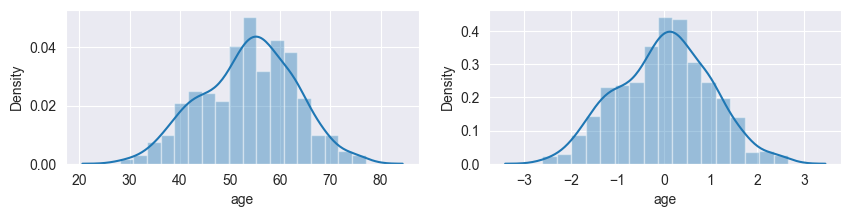

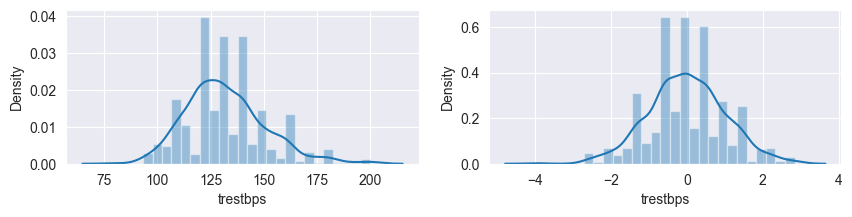

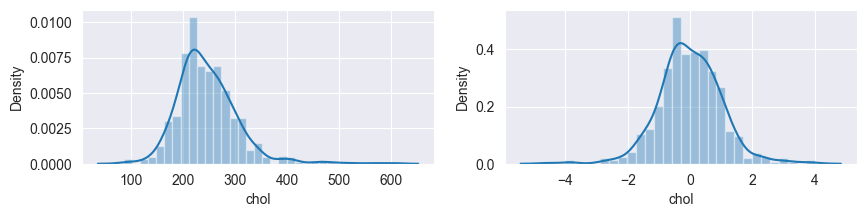

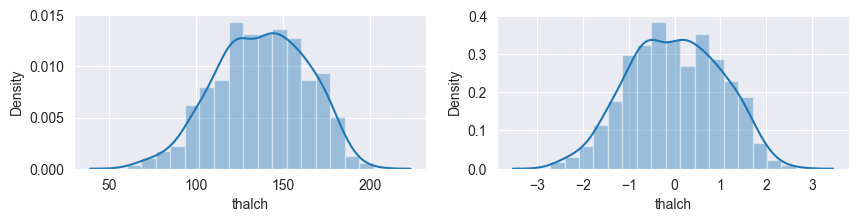

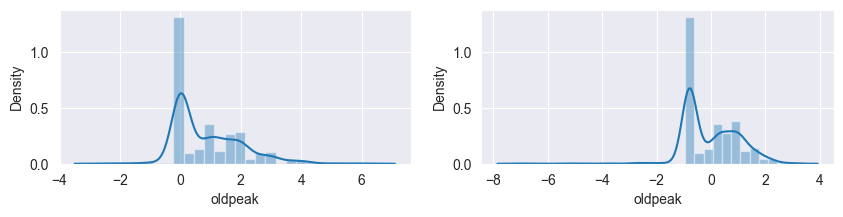

In [37]:
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

X_train_pt = transformer.fit_transform(X_train[numerical_cols])
X_train_lg = LogTransformer().fit_transform(X_train[numerical_cols])

lambda_df = pd.DataFrame({'cols': numerical_cols, 'box_cox_lambdas': transformer.lambdas_})
X_train_pt_df = pd.DataFrame(X_train_pt, columns=numerical_cols)


for cols in numerical_cols:
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))
    sns.distplot(X_train[cols], ax=axs[0])
    sns.distplot(X_train_pt_df[cols], ax=axs[1])
    plt.show()

In [39]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5),
    ('trf6', trf6),
    ('trf7', trf7),
    ('model', LinearRegression())
])
# output = pipe.fit(X_train)
# transformed_X = output.transform(X_train)
# transformed_X

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

#print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")


R2 Score: 0.3812


In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X, y, cv=5)
print(scores.mean())


-0.13652109240709112


<Axes: xlabel='trestbps', ylabel='Density'>

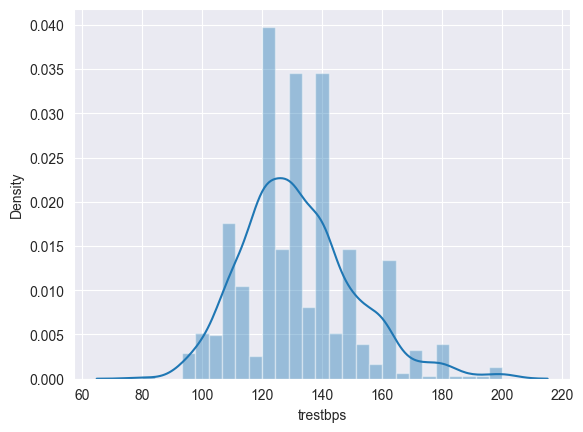

In [41]:
sns.distplot(X_train[X_train['trestbps'] != 0]['trestbps'], label='Before imputation')

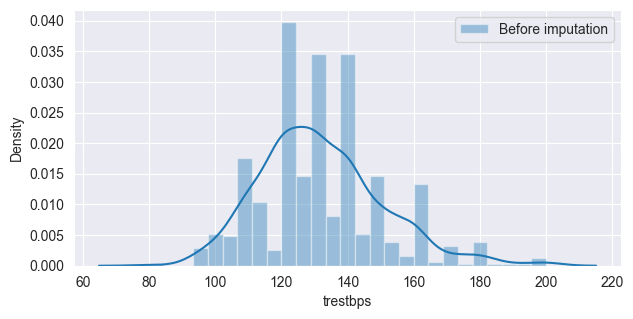

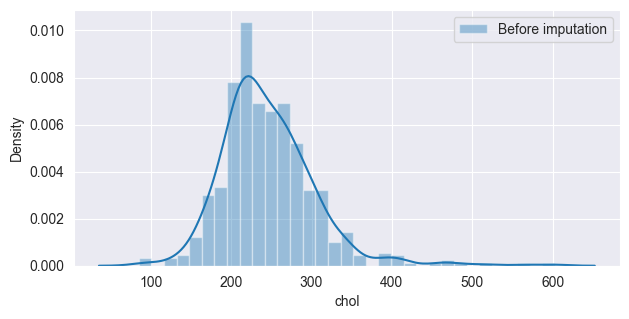

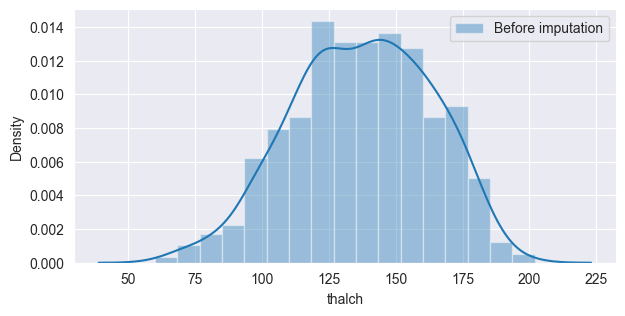

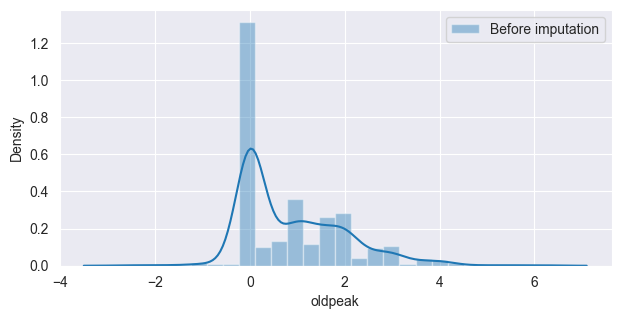

In [42]:
numerical_cols_mcar = ['trestbps', 'chol', 'thalch', 'oldpeak']
    
import seaborn as sns
for cols in numerical_cols_mcar:


    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    sns.distplot(X_train[cols], label='Before imputation')
    # sns.distplot(output['cat__exang'], label='After imputation')
    # plt.title('Exang Distribution')

    # plt.subplot(2, 2, 2)
    # sns.distplot(X_train['restecg'].value_counts(), label='Before imputation')
    # sns.distplot(output['cat__restecg'].value_counts(), label='After imputation')
    # plt.title('Restecg Distribution')

    # plt.subplot(2, 2, 3)
    # sns.distplot(X_train['thal'].value_counts(), label='Before imputation')
    # sns.distplot(output['remainder__thal'].value_counts(), label='After imputation')
    # plt.title('Thal Distribution')

    plt.tight_layout()
    plt.legend()
plt.show()

In [43]:
is_zero = X_train[X_train['chol'] == 0].shape[0]
total = X_train['chol'].dropna().shape[0]
percentage = (is_zero / total) * 100
percentage

0.0

NameError: name 'output' is not defined

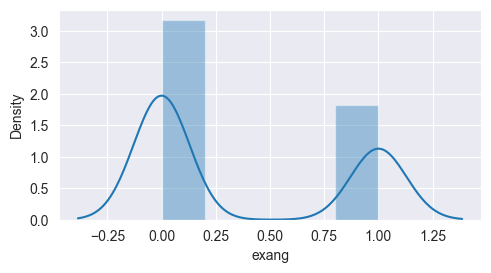

In [44]:
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.distplot(X_train['exang'], label='Before imputation')
sns.distplot(output['cat__exang'], label='After imputation')
plt.title('Exang Distribution')

plt.subplot(2, 2, 2)
sns.distplot(X_train['restecg'].value_counts(), label='Before imputation')
sns.distplot(output['cat__restecg'].value_counts(), label='After imputation')
plt.title('Restecg Distribution')

plt.subplot(2, 2, 3)
sns.distplot(X_train['thal'].value_counts(), label='Before imputation')
sns.distplot(output['remainder__thal'].value_counts(), label='After imputation')
plt.title('Thal Distribution')

plt.tight_layout()
plt.legend()
plt.show()

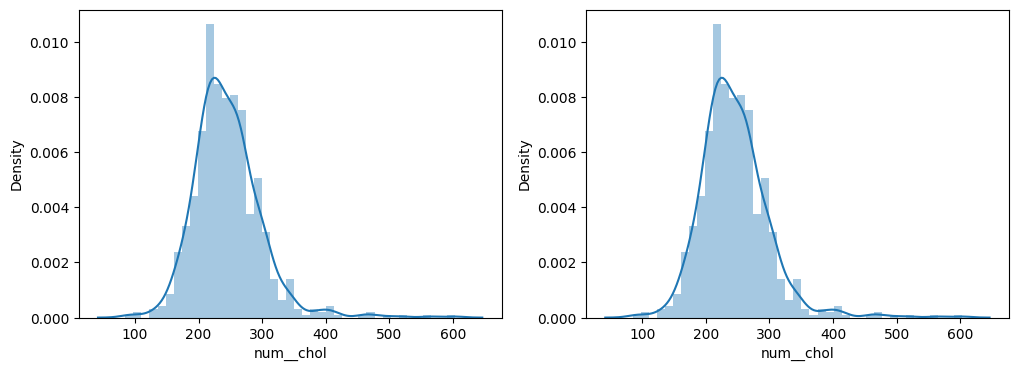

In [ ]:
import seaborn as sns 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(X_step2['num__chol'])
plt.subplot(1, 2, 2)
sns.distplot(X_step3['num__chol'])

plt.show()

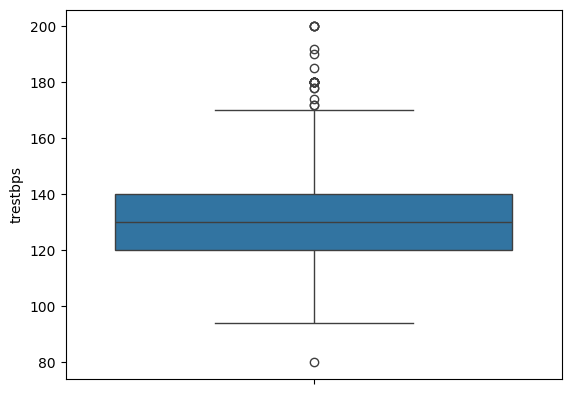

In [ ]:
sns.boxplot(X_train['trestbps'])
plt.show()

In [ ]:
import pandas as pd
import json

# JSON data (could also load from file using json.load())
insurance_json = [
  {"pid": 1, "tiv_2015": 10, "tiv_2016": 5, "lat": 10, "lon": 10},
  {"pid": 2, "tiv_2015": 20, "tiv_2016": 20, "lat": 20, "lon": 20},
  {"pid": 3, "tiv_2015": 10, "tiv_2016": 30, "lat": 20, "lon": 20},
  {"pid": 4, "tiv_2015": 10, "tiv_2016": 40, "lat": 40, "lon": 40}
]


# Convert JSON to DataFrame
df = pd.DataFrame(insurance_json)

df['location'] = df['lat'].astype(str) + ', ' + df['lon'].astype(str)

# Step 1: Identify duplicate 'location' values
duplicate_mask = df.duplicated(subset=['lat', 'lon'], keep=False)

# Step 2: Filter out ALL rows where 'lat_lon' is duplicated (both original and duplicates)
filtered_df = df[~duplicate_mask]

x = filtered_df.groupby('tiv_2015')['tiv_2016'].sum()
result_df = x.to_frame()

result_df

import pandas as pd

def find_investments(df: pd.DataFrame) -> pd.DataFrame:
    df['location'] = df['lat'].astype(str) + ', ' + df['lon'].astype(str)
    duplicate_mask = df.duplicated(subset=['location'], keep='first')
    total_sum = df[~duplicate_mask]['tiv_2016'].sum()
    return pd.DataFrame({'tiv_2016': [total_sum]})

,tiv_2016
tiv_2015,
10,45
